# Version 1 Simulation

The first version of this series is a basic control model. Given an elevation profile $H(x)$ and a time target, minimize energy usage.
We assume the time target is constant, since we are racing at a given overall pace. In other words, we already know the average speed $E(V) = dist/time$

In [1]:
import jax.numpy as jnp
from jax import jit, vmap, lax
from jax import random
import matplotlib.pyplot as plt

@jit
def _cov_math(t, s, H):
    return 0.5 * (jnp.abs(t) ** 2 * H + jnp.abs(s) ** 2 * H - jnp.abs(t - s) ** 2 * H)


def _fbm_covariance(n, H) -> jnp.ndarray:
    tidx = jnp.arange(1, n + 1)
    t, s = jnp.meshgrid(tidx, tidx)

    # fBm covariance equation from wikipedia
    cov = 0.5 * (jnp.abs(t) ** 2 * H + jnp.abs(s) ** 2 * H - jnp.abs(t - s) ** 2 * H)
    return cov

# generate terrain using fractional brownian motion
def gen_elevation_profile(rngkey: random.PRNGKey, n_steps: int, H: float):
    t = jnp.linspace(0,1,n_steps)
    cov = _fbm_covariance(n_steps, H)
    # using the "method 1" (cholesky decomposition)
    sigma = jnp.linalg.cholesky(cov)
    # create a vector of n_steps gaussian normal values
    v = random.normal(rngkey, shape=(n_steps))
    # convert these to fbm lines

    fbm_samples = sigma * v

    return t, fbm_samples




An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[[nan -0. -0. ... -0. -0. -0.]
 [nan nan -0. ... -0. -0. -0.]
 [nan nan nan ... -0. -0. -0.]
 ...
 [nan nan nan ... nan -0. -0.]
 [nan nan nan ... nan nan -0.]
 [nan nan nan ... nan nan nan]]


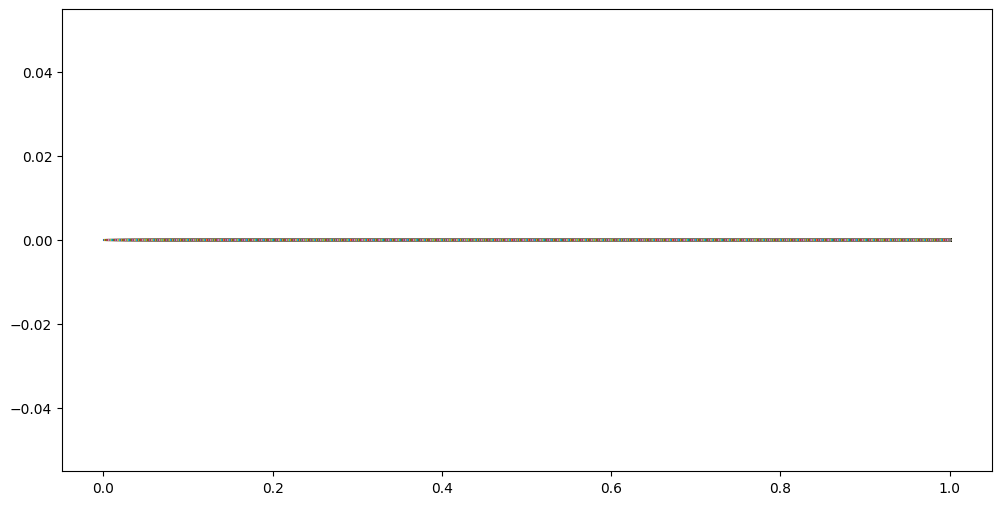

In [2]:
key = random.PRNGKey(0)
steps = 1000
samples = 5

H = 0.6

t, fbm = gen_elevation_profile(key, steps, H)
plt.figure(figsize=(12,6))
print(fbm)
for i in range(fbm.shape[0]):
    plt.plot(t, fbm[i], label=f"Sample {i}")

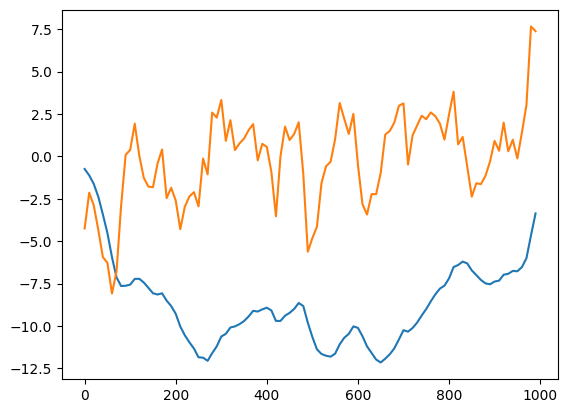

In [ ]:
steps = 100
key = random.key(25)

def uniform_window(n):
    return jnp.ones(n)/n

def generate_basic_terrain(key, steps=100, yscale=1.0, xscale=10.0, window=uniform_window, window_size=5):
    key, split = random.split(key)
    v = random.normal(split, shape=(steps))
    y = jnp.cumsum(v) * yscale
    # smooth with a windowing function
    y_smooth = jnp.convolve(y, window(window_size), mode='same')
    # compute the x-values
    x = jnp.arange(steps) * xscale
    return x,y_smooth


x,y = generate_basic_terrain(key)
    
slope = jnp.atan(jnp.diff(y, prepend=0) / 10.0) * 180 / jnp.pi
plt.plot(x,y)
plt.plot(x, slope)

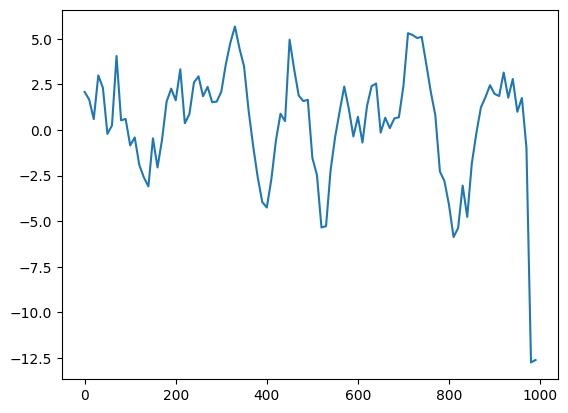

In [14]:
# we can compute the slope at any point along the terrain
plt.plot(x, slope)